In [ ]:
import pyspark

In [ ]:
import matplotlib

**Refresher: Basic SQL Operations in Spark SQL**

Tugas 1 : Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PraktikumBigData9").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) AS Rata2Gaji FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|         Rata2Gaji|
+------------------+
|3266.6666666666665|
+------------------+



**Advanced Queries for Data Analysis**

Tugas 2 : Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.

In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



Tugas Tambahan 2

1. Cari rata-rata gaji per departemen.

In [ ]:
spark.sql('''
SELECT DeptId, AVG(Salary) AS RATA2PERDEPT FROM employees GROUP BY DeptId
''').show()

+------+------------+
|DeptId|RATA2PERDEPT|
+------+------------+
|     1|      2850.0|
|     2|      4100.0|
+------+------------+



2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.

In [ ]:
# Menghitung rata-rata gaji berdasarkan gender dan membuat tampilan sementara
avggender = spark.sql('SELECT Gender, AVG(Salary) AS Rata2 FROM employees GROUP BY Gender')
avggender.show()
avggender.createOrReplaceTempView("avggender")

# Query untuk mencari karyawan dengan gaji di atas rata-rata berdasarkan gender
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN avggender a ON e.Gender = a.Gender
WHERE e.Salary > a.Rata2
''').show()

+------+------+
|Gender| Rata2|
+------+------+
|     M|2850.0|
|     F|4100.0|
+------+------+

+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+



3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [ ]:
spark.sql('''
SELECT Name, Age, DeptId, Salary, ROW_NUMBER() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as rank FROM employees
''').show()

+-----+---+------+------+----+
| Name|Age|DeptId|Salary|rank|
+-----+---+------+------+----+
|James| 34|     1|  3000|   1|
|  Lee| 23|     1|  2700|   2|
| Anna| 28|     2|  4100|   1|
+-----+---+------+------+----+



**Window Functions**

Tugas 3 : Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



**Spark SQL Queries Advanced**

Tugas 4 : Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Tugas 5 : Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan ranking setiap karyawan dalam departemen berdasarkan gaji.

In [ ]:
avgdept = spark.sql('''
SELECT DeptId, AVG(Salary) AS Rata2
FROM employees GROUP BY DeptId
''')
avgdept.createOrReplaceTempView("avgdept")

spark.sql('''
SELECT e.Name, e.DeptId, d.DeptName, e.Salary
FROM employees e
JOIN avgdept a ON e.DeptId = a.DeptId
JOIN departments d ON e.DeptId = d.DeptId
''').show()

spark.sql('''
SELECT Name, Age, Salary, DeptId, ROW_NUMBER() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+------+---------+------+
| Name|DeptId| DeptName|Salary|
+-----+------+---------+------+
|James|     1|       HR|  3000|
|  Lee|     1|       HR|  2700|
| Anna|     2|Marketing|  4100|
+-----+------+---------+------+

+-----+---+------+------+----+
| Name|Age|Salary|DeptId|rank|
+-----+---+------+------+----+
|James| 34|  3000|     1|   1|
|  Lee| 23|  2700|     1|   2|
| Anna| 28|  4100|     2|   1|
+-----+---+------+------+----+



Tugas 6: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

In [ ]:
spark.sql('''
SELECT d.DeptName, e.Age, e.Salary, AVG(e.Salary) OVER (PARTITION BY d.DeptName, e.Age) AS RATA2GAJI
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+---+------+---------+
| DeptName|Age|Salary|RATA2GAJI|
+---------+---+------+---------+
|       HR| 23|  2700|   2700.0|
|       HR| 34|  3000|   3000.0|
|Marketing| 28|  4100|   4100.0|
+---------+---+------+---------+



**Advanced Data Analysis and Visualization**

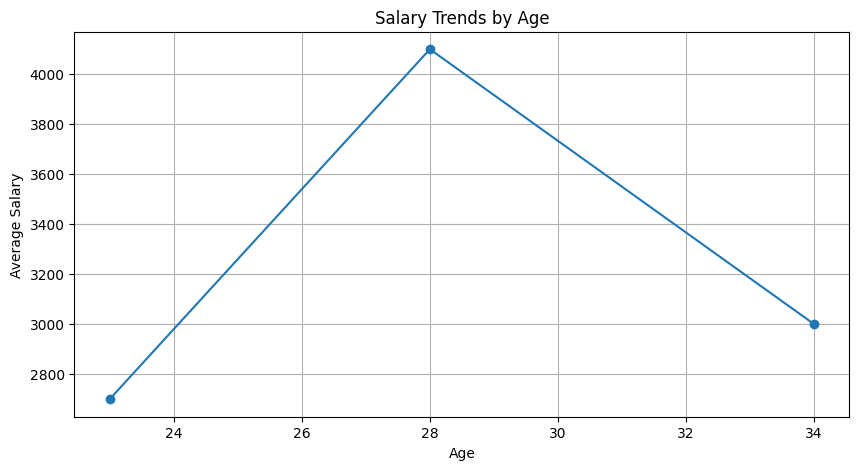

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

**Homework**

Tugas 1: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.

   DeptId  TotalGaji  JumlahKaryawan
0       1       5700               2
1       2       4100               1


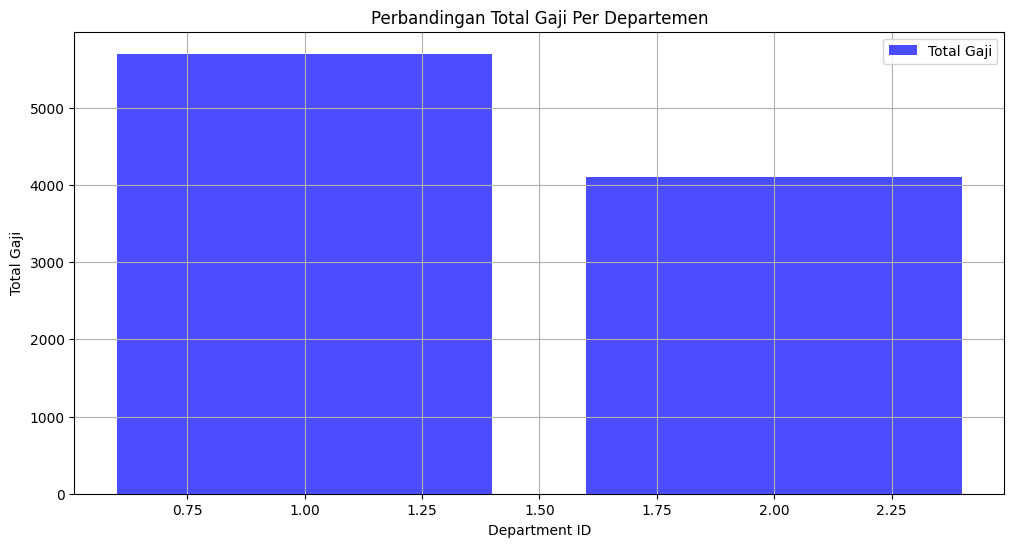

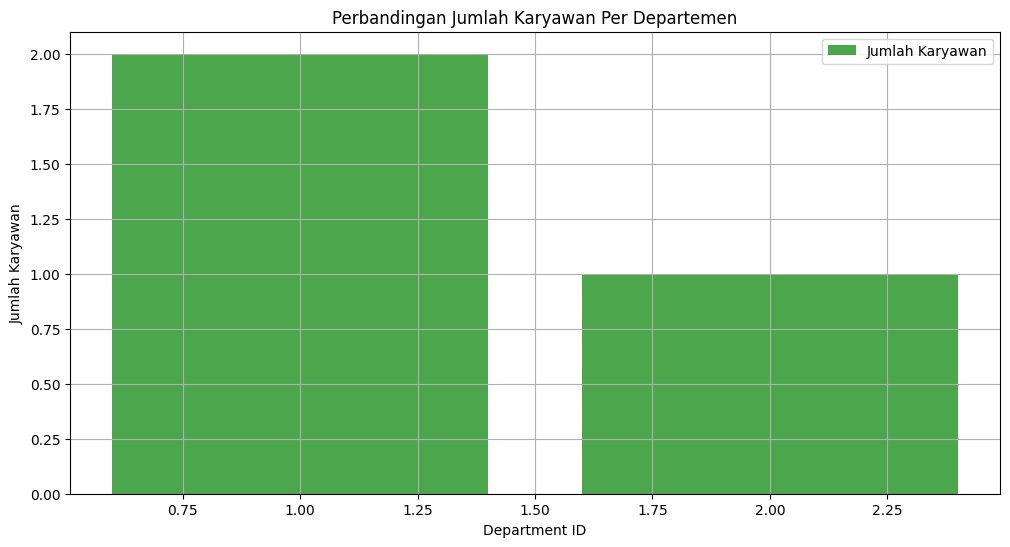

In [ ]:
# Query untuk mendapatkan total gaji dan jumlah karyawan per departemen
salary_sum = spark.sql('''
SELECT DeptId, SUM(Salary) AS TotalGaji, COUNT(Name) AS JumlahKaryawan
FROM employees
GROUP BY DeptId
''').toPandas()

print(salary_sum)

# Visualisasi menggunakan bar chart untuk perbandingan total gaji per departemen
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(salary_sum['DeptId'], salary_sum['TotalGaji'], color='b', alpha=0.7, label='Total Gaji')
plt.xlabel('Department ID')
plt.ylabel('Total Gaji')
plt.title('Perbandingan Total Gaji Per Departemen')
plt.grid(True)
plt.legend()
plt.show()

# Jika ingin juga membandingkan jumlah karyawan dalam grafik terpisah:
plt.figure(figsize=(12, 6))
plt.bar(salary_sum['DeptId'], salary_sum['JumlahKaryawan'], color='g', alpha=0.7, label='Jumlah Karyawan')
plt.xlabel('Department ID')
plt.ylabel('Jumlah Karyawan')
plt.title('Perbandingan Jumlah Karyawan Per Departemen')
plt.grid(True)
plt.legend()
plt.show()


Tugas 2: Temukan karyawan dengan gaji di atas rata-rata dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.

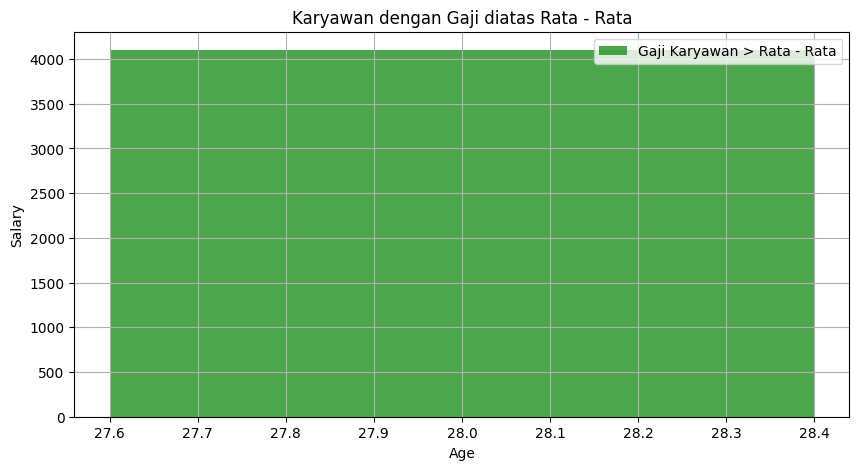

In [ ]:
avgage = spark.sql('''
SELECT Name, Age, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').toPandas()

plt.figure(figsize=(10, 5))
plt.bar(avgage['Age'], avgage['Salary'], color='g', alpha=0.7, label='Gaji Karyawan > Rata - Rata')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Karyawan dengan Gaji diatas Rata - Rata')
plt.legend()
plt.grid(True)
plt.show()

Tugas 3: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

+-----------+---------------+-----------+
|total_nilai|rata_rata_nilai|jumlah_data|
+-----------+---------------+-----------+
|     8249.5|         82.495|        100|
+-----------+---------------+-----------+

+---+-----+----------+--------+----+
| ID| Nama|    Matkul|    Nama|Umur|
+---+-----+----------+--------+----+
|  1| Budi|     Kimia|  Anshor|  32|
|  2|  Ani|Matematika|Triandri|  29|
|  3| Joko|   Biologi|   Dimas|  31|
|  4| Siti|Matematika|Triandri|  29|
|  5| Agus|    Fisika|   Komar|  32|
|  6| Dewi|   Biologi|   Dimas|  31|
|  7|  Eka|Matematika|Triandri|  29|
|  8|  Adi|    Fisika|   Komar|  32|
|  9| Rina|Matematika|Triandri|  29|
| 10| Hadi|   Biologi|   Dimas|  31|
| 11| Maya|    Fisika|   Komar|  32|
| 12| Rudi|Matematika|Triandri|  29|
| 13|Surya|     Kimia|  Anshor|  32|
| 14| Wati|   Biologi|   Dimas|  31|
| 15|  Ari|     Kimia|  Anshor|  32|
| 16|  Lia|Matematika|Triandri|  29|
| 17| Dian|    Fisika|   Komar|  32|
| 18| Dodi|   Biologi|   Dimas|  31|
| 19| Nina| 

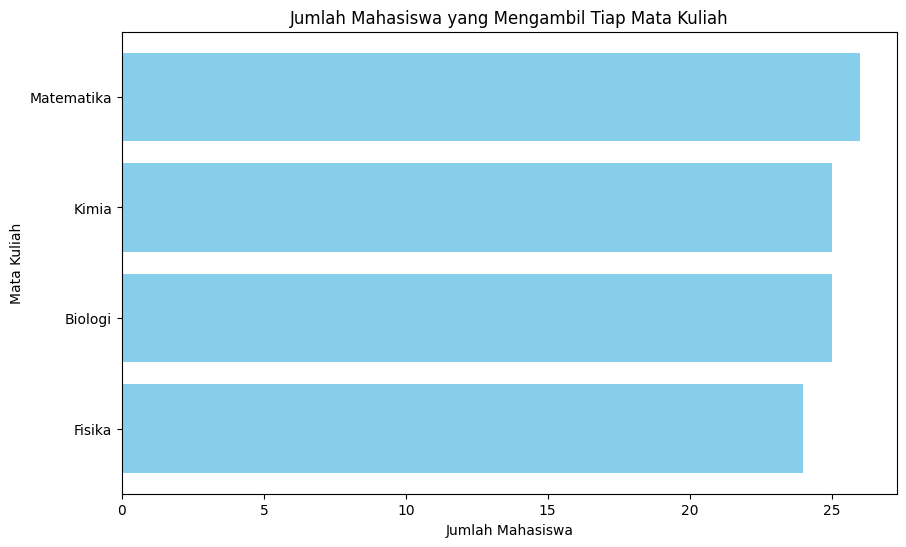

In [ ]:
datanilai = spark.read.csv("DatasetPelatihan.csv", header=True, inferSchema=True)
datanilai.createOrReplaceTempView("DataNilaiPelatihan")

#AVERAGE, COUNT, SUM
result_sum_avg_count = spark.sql("""
    SELECT
        SUM(nilai) AS total_nilai,
        AVG(nilai) AS rata_rata_nilai,
        COUNT(nilai) AS jumlah_data
    FROM DataNilaiPelatihan
""")
result_sum_avg_count.show()

#JOIN DENGAN DATA DOSEN
data_dosen = [
    ("Kimia", "Anshor", 32),
    ("Matematika", "Triandri", 29),
    ("Biologi", "Dimas", 31),
    ("Fisika", "Komar", 32)
]
df_siswa = spark.createDataFrame(data_dosen, ["Matkul", "Nama", "Umur"])
df_siswa.createOrReplaceTempView("DataDosen")

#MENAMPILKAN HASIL JOIN (20 BARIS)
hasil_join = spark.sql("""
SELECT dnp.ID, dnp.Nama, dnp.Matkul, dd.Nama, dd.Umur
FROM DataNilaiPelatihan dnp
JOIN DataDosen dd ON dnp.Matkul = dd.Matkul
ORDER BY dnp.ID
""")
hasil_join.show(20)

import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah mahasiswa per mata kuliah
matkul_hitung = spark.sql("""
    SELECT Matkul, COUNT(ID) AS jumlah_mahasiswa
    FROM DataNilaiPelatihan
    GROUP BY Matkul
    ORDER BY jumlah_mahasiswa DESC
""")

# Konversi hasil ke Pandas DataFrame
df_matkul_hitung = matkul_hitung.toPandas()

# Hitung jumlah mahasiswa per mata kuliah dengan memfilter nilai None
matkul_hitung = spark.sql("""
    SELECT Matkul, COUNT(ID) AS jumlah_mahasiswa
    FROM DataNilaiPelatihan
    WHERE Matkul IS NOT NULL
    GROUP BY Matkul
    ORDER BY jumlah_mahasiswa DESC
""")

# Konversi hasil ke Pandas DataFrame
df_matkul_hitung = matkul_hitung.toPandas()

print(df_matkul_hitung)

# Pastikan tidak ada nilai None atau NaN
df_matkul_hitung.dropna(inplace=True)

# Membuat visualisasi bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_matkul_hitung["Matkul"], df_matkul_hitung["jumlah_mahasiswa"], color="skyblue")
plt.xlabel("Jumlah Mahasiswa")
plt.ylabel("Mata Kuliah")
plt.title("Jumlah Mahasiswa yang Mengambil Tiap Mata Kuliah")
plt.gca().invert_yaxis()  # Membalik sumbu y agar mata kuliah dengan jumlah tertinggi berada di atas
plt.show()
